## Data loading - YLFW Benchmark
Source: https://github.com/JessyFrish/YLFW_Links?tab=readme-ov-file

Make suitable for ArcFace and MagFace (112x112) and FaceNet (160x160)

### Data folder structure and metadata


In [1]:
# Load packages

# Common
import pandas as pd
import numpy as np
import os
import cv2 as cv
from IPython.display import clear_output as cls
import json

# Data
from glob import glob

# Data Visuaalization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Model


### Descriptive analysis of data

#### Data concatenation

In [2]:
## Create dataframe

# Define the path to the raw data directory
raw_data_path = '../data/raw/'

# Initialize lists to store image characteristics
img_names = []
id_class = []
ethnicities = []

# Iterate through the directories of each ethnicity (e.g., 'Asian')
ethnicities_list = os.listdir(raw_data_path + 'YLFW_bench/data_p2')[1:] #To ensure DS Store is not included. DELETE
print(ethnicities_list)
for ethnicity in ethnicities_list:
    ethnicity_col = ethnicity.split('_')[0]
    id = int(ethnicity.split('_')[1:][0])
    ethnicity_dir = os.path.join(raw_data_path + 'YLFW_bench/data_p2', ethnicity)
    if os.path.isdir(ethnicity_dir):
        # Iterate through image files in the ethnicity directory
        for img_name in os.listdir(ethnicity_dir):
            # Append image characteristics to lists
            img_name = img_name.split('.')[0]
            img_names.append(img_name)
            ethnicities.append(ethnicity_col)
            id_class.append(id)


# Create a DataFrame from the lists
data = {'img_name': img_names, 'ethnicity': ethnicities, 'id_class': id_class}
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


['African_1', 'Asian_14', 'Asian_386', 'Caucasian_204', 'Caucasian_386', 'Caucasian_604', 'Indian_224', 'Indian_80', 'Indian_98']


,img_name,ethnicity,id_class
0,African_1_11,African,1
1,African_1_4,African,1
2,Asian_14_12,Asian,14
3,Asian_14_19,Asian,14
4,Asian_14_33,Asian,14


In [3]:
# Read the JSON file into a JSON variable
with open('../data/raw/age_estimation/output_data_precroped_all_age.json', 'r') as file:
    json_data = json.load(file)

# Convert the JSON data to a DataFrame
age_df = pd.DataFrame.from_dict(json_data, orient='index', columns=['Age'])
# Convert the 'Age' column to numeric
age_df['Age'] = pd.to_numeric(age_df['Age'])
age_df.reset_index(inplace=True)
age_df.columns = ['img_name', 'Age']

age_df.head()


,img_name,Age
0,Caucasian_1008_18,8.0
1,Asian_225_72,11.0
2,Asian_238_1,3.0
3,Caucasian_1110_17,4.0
4,Caucasian_364_12,2.0


In [4]:
# Concatenate dataframes
final_df = pd.merge(age_df, df, on='img_name', how='inner')
final_df.head()

,img_name,Age,ethnicity,id_class
0,Caucasian_604_4,1.0,Caucasian,604
1,Asian_386_43,9.0,Asian,386
2,Indian_98_12,4.0,Indian,98
3,Asian_386_2,9.0,Asian,386
4,Caucasian_204_1,1.0,Caucasian,204


In [5]:
# Ensure 'Age' is of type integer
final_df['Age'] = final_df['Age'].astype(int)

# Define the age groups and corresponding labels
age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

# Update the DataFrame with age groupings
final_df['children_agegroup'] = pd.cut(final_df['Age'], bins=age_bins, labels=age_labels, right=False)


In [6]:
final_df.head()

,img_name,Age,ethnicity,id_class,children_agegroup
0,Caucasian_604_4,1,Caucasian,604,0-3
1,Asian_386_43,9,Asian,386,7-9
2,Indian_98_12,4,Indian,98,4-6
3,Asian_386_2,9,Asian,386,7-9
4,Caucasian_204_1,1,Caucasian,204,0-3


In [7]:
final_df[final_df[]]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1066114490.py, line 1)

In [8]:
print(final_df.describe(), final_df.info(), final_df.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   img_name           32 non-null     object  
 1   Age                32 non-null     int64   
 2   ethnicity          32 non-null     object  
 3   id_class           32 non-null     int64   
 4   children_agegroup  32 non-null     category
dtypes: category(1), int64(2), object(2)
memory usage: 1.5+ KB
             Age   id_class
count  32.000000   32.00000
mean    5.125000  253.62500
std     3.799406  189.67081
min     0.000000    1.00000
25%     2.000000   80.00000
50%     4.000000  214.00000
75%     8.250000  386.00000
max    14.000000  604.00000 None img_name          Age  ethnicity  id_class  children_agegroup
African_1_11      5    African    1         4-6                  1
African_1_4       2    African    1         0-3                  1
Indian_98_12      4    Indian     98   

#### Data distributions
(Evt efter age groups)

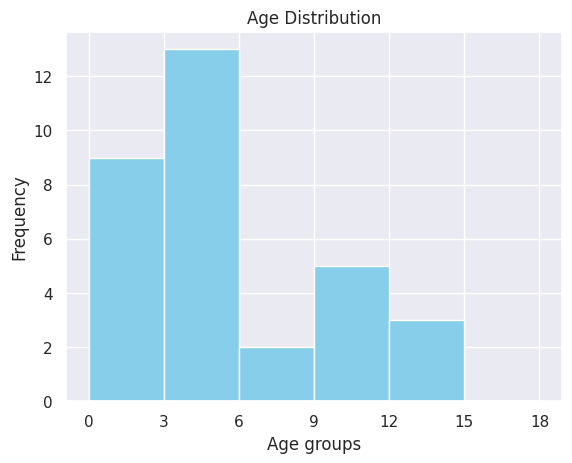

In [9]:
# Define bin edges for each group of 3 years
bin_edges = [0, 3, 6, 9, 12, 15, 18]
plt.hist(final_df['Age'], bins=bin_edges, color='skyblue')
plt.xticks(bin_edges)
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


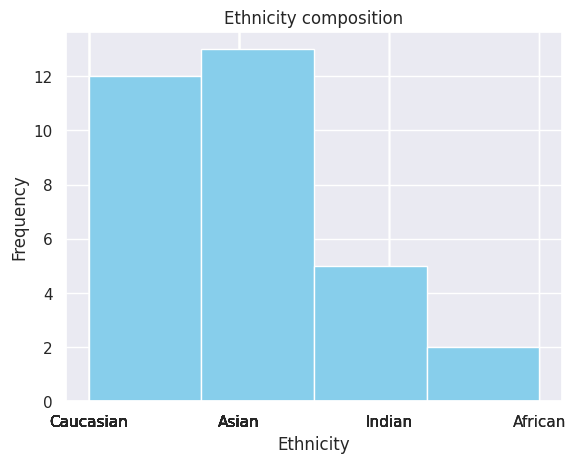

In [10]:
# Define bin edges for each group of 3 years
plt.hist(final_df['ethnicity'], bins=4, color='skyblue')
plt.xticks(final_df['ethnicity'])
plt.xlabel('Ethnicity')
plt.ylabel('Frequency')
plt.title('Ethnicity composition')
plt.show()


#### Save df

In [11]:
final_df["im_id"] = final_df["img_name"].apply(lambda x: "_".join(x.split("_")[:2]))
final_df.to_csv('../data/raw/YLFW_bench/raw_ylfw_df.csv', index=False)

#### OBS Overvej om man skal sænke alle aldre højere end 18 i YLFW til 18..

Check age group difference between each id. 

In [12]:
# Per image_name
final_df["im_id"] = final_df["img_name"].apply(lambda x: "_".join(x.split("_")[:2]))
age_df.head()

,img_name,Age
0,Caucasian_1008_18,8.0
1,Asian_225_72,11.0
2,Asian_238_1,3.0
3,Caucasian_1110_17,4.0
4,Caucasian_364_12,2.0


In [13]:
# Groupby and get both std and counts

final_df.groupby("im_id").agg({'Age': ['min', 'max','std', 'count']}).sort_values(by=('Age', 'std'), ascending=False).head(10)

Age                    
              min max       std count
im_id                                
African_1       2   5  2.121320     2
Caucasian_204   1   5  2.049390     5
Asian_386       8  13  1.690309     8
Caucasian_386   2   4  1.154701     4
Asian_14        2   4  0.707107     5
Indian_80       5   6  0.707107     2
Indian_98       3   4  0.707107     2
Caucasian_604   0   1  0.577350     3
Indian_224     14  14       NaN     1

In [14]:
final_df[final_df["im_id"] == "Asian_386"]

,img_name,Age,ethnicity,id_class,children_agegroup,im_id
1,Asian_386_43,9,Asian,386,7-9,Asian_386
3,Asian_386_2,9,Asian,386,7-9,Asian_386
9,Asian_386_30,10,Asian,386,10-12,Asian_386
10,Asian_386_40,9,Asian,386,7-9,Asian_386
15,Asian_386_27,8,Asian,386,7-9,Asian_386
16,Asian_386_38,13,Asian,386,13-15,Asian_386
22,Asian_386_42,10,Asian,386,10-12,Asian_386
26,Asian_386_3,12,Asian,386,10-12,Asian_386


In [15]:
# Per image_name
age_df["im_id"] = age_df["img_name"].apply(lambda x: "_".join(x.split("_")[:2]))
age_df.head()

,img_name,Age,im_id
0,Caucasian_1008_18,8.0,Caucasian_1008
1,Asian_225_72,11.0,Asian_225
2,Asian_238_1,3.0,Asian_238
3,Caucasian_1110_17,4.0,Caucasian_1110
4,Caucasian_364_12,2.0,Caucasian_364


In [16]:
# Groupby and get both std and counts

age_df.groupby("im_id").agg({'Age': ['min', 'max','std', 'count']}).sort_values(by=('Age', 'std'), ascending=False).head(10)

Age                       
                min   max        std count
im_id                                     
Indian_87       0.0  30.0  21.213203     2
Asian_620       2.0  29.0  19.091883     2
Asian_570       2.0  35.0  18.502252     3
African_44      6.0  32.0  18.384776     2
Asian_96        0.0  26.0  18.384776     2
Indian_25       7.0  32.0  17.677670     2
Caucasian_1127  7.0  31.0  16.970563     2
African_343     9.0  32.0  16.263456     2
African_550     3.0  25.0  15.556349     2
Indian_109      6.0  33.0  15.307950     3